In [27]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
DATA = '/Users/jane/Desktop/data-to-use/1_17.csv'

[nltk_data] Downloading package punkt to /Users/jane/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [33]:
from nltk.corpus import wordnet
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/jane/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
df = pd.read_csv(DATA)

In [35]:
df.head()

,Unnamed: 0,Unnamed: 0.1,ratings,action,categories,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
0,1031,1016,NaN,Visited,"[['/Internet & Telecom', 0.8500000238418579]]",NaN,NaN,NaN,NaN,2019,8,28,12,50,2,NaN,NaN,search,Google Search,2019-08-28 12:50:00
1,1030,1015,NaN,Searched,"[['/Shopping/Apparel', 0.6600000262260437]]",NaN,NaN,NaN,NaN,2019,9,21,22,27,5,NaN,NaN,search,waterloo outlet,2019-09-21 22:27:00
2,1029,1014,NaN,Searched,"[['/Shopping/Apparel', 0.6600000262260437]]",NaN,NaN,NaN,NaN,2019,9,22,15,53,6,NaN,NaN,search,waterloo outlet,2019-09-22 15:53:00
3,1028,1013,NaN,Searched,"[['/Shopping/Apparel', 0.6600000262260437]]",NaN,NaN,NaN,NaN,2019,9,22,23,4,6,NaN,NaN,search,waterloo outlet,2019-09-22 23:04:00
4,1026,1011,NaN,Searched,[],NaN,NaN,NaN,NaN,2019,9,23,13,49,0,NaN,NaN,search,5852480290,2019-09-23 13:49:00


In [36]:
feb = df[(df['months']  == 2) & (df['action'] == 'Searched')]
searches = feb['query'].tolist()

In [37]:
searches

['is it better to sleep on right or left',
 'is it better to sleep on right or left',
 'Knocks',
 'ny knicks',
 'ny knicks',
 'ny knicks',
 'can i eat wings on keto',
 'who ball is it super bowl',
 'who ball is it super bowl',
 'air jordan 1 clients super bowl',
 'Air Jordan 1 Clients',
 'air jordan 1 clients super bowl',
 'facilities university of rochester',
 'how to restart iphone',
 'bible verse about broken jars',
 'bible says its our job to judge',
 'bible verse judging angels',
 'Bible verse sell the souls of men',
 'Pharisees say jesus was a false messiah',
 'two candlesticks bible',
 'two candlesticks to prove existence of God',
 'two candlesticks of creation bible verse',
 'Two candlesticks of creation',
 'ron goldman',
 'nba games today',
 'nba games today',
 'nba games today',
 'nba games today',
 'hebrew strong 710',
 'Evan turner',
 'pareto optimum',
 'Flyspeedcity',
 'Flyspeedcity',
 'Flyspeedcity',
 'Flyspeedcity',
 'Flyspeedcity',
 'Dominos',
 'amy tan rules of the gam

In [39]:
tokenized = []
for q in searches:
    tokenlist = word_tokenize(q)
    for token in tokenlist:
        tokenized.append(token)

In [40]:
tokenized

['is',
 'it',
 'better',
 'to',
 'sleep',
 'on',
 'right',
 'or',
 'left',
 'is',
 'it',
 'better',
 'to',
 'sleep',
 'on',
 'right',
 'or',
 'left',
 'Knocks',
 'ny',
 'knicks',
 'ny',
 'knicks',
 'ny',
 'knicks',
 'can',
 'i',
 'eat',
 'wings',
 'on',
 'keto',
 'who',
 'ball',
 'is',
 'it',
 'super',
 'bowl',
 'who',
 'ball',
 'is',
 'it',
 'super',
 'bowl',
 'air',
 'jordan',
 '1',
 'clients',
 'super',
 'bowl',
 'Air',
 'Jordan',
 '1',
 'Clients',
 'air',
 'jordan',
 '1',
 'clients',
 'super',
 'bowl',
 'facilities',
 'university',
 'of',
 'rochester',
 'how',
 'to',
 'restart',
 'iphone',
 'bible',
 'verse',
 'about',
 'broken',
 'jars',
 'bible',
 'says',
 'its',
 'our',
 'job',
 'to',
 'judge',
 'bible',
 'verse',
 'judging',
 'angels',
 'Bible',
 'verse',
 'sell',
 'the',
 'souls',
 'of',
 'men',
 'Pharisees',
 'say',
 'jesus',
 'was',
 'a',
 'false',
 'messiah',
 'two',
 'candlesticks',
 'bible',
 'two',
 'candlesticks',
 'to',
 'prove',
 'existence',
 'of',
 'God',
 'two',
 '

In [43]:
for word in tokenized:
    if word in stop_words:
        tokenized.remove(word)
tokenized

['better',
 'sleep',
 'right',
 'left',
 'better',
 'sleep',
 'right',
 'left',
 'Knocks',
 'ny',
 'knicks',
 'ny',
 'knicks',
 'ny',
 'knicks',
 'eat',
 'wings',
 'keto',
 'ball',
 'super',
 'bowl',
 'ball',
 'super',
 'bowl',
 'air',
 'jordan',
 '1',
 'clients',
 'super',
 'bowl',
 'Air',
 'Jordan',
 '1',
 'Clients',
 'air',
 'jordan',
 '1',
 'clients',
 'super',
 'bowl',
 'facilities',
 'university',
 'rochester',
 'restart',
 'iphone',
 'bible',
 'verse',
 'broken',
 'jars',
 'bible',
 'says',
 'job',
 'judge',
 'bible',
 'verse',
 'judging',
 'angels',
 'Bible',
 'verse',
 'sell',
 'souls',
 'men',
 'Pharisees',
 'say',
 'jesus',
 'false',
 'messiah',
 'two',
 'candlesticks',
 'bible',
 'two',
 'candlesticks',
 'prove',
 'existence',
 'God',
 'two',
 'candlesticks',
 'creation',
 'bible',
 'verse',
 'Two',
 'candlesticks',
 'creation',
 'ron',
 'goldman',
 'nba',
 'games',
 'today',
 'nba',
 'games',
 'today',
 'nba',
 'games',
 'today',
 'nba',
 'games',
 'today',
 'hebrew',
 'st

In [44]:
from nltk.stem import PorterStemmer 
ps = PorterStemmer()
stemmed = []

for word in tokenized:
    stem = ps.stem(word)
    stemmed.append(stem)
    

['better',
 'sleep',
 'right',
 'left',
 'better',
 'sleep',
 'right',
 'left',
 u'knock',
 'ny',
 u'knick',
 'ny',
 u'knick',
 'ny',
 u'knick',
 'eat',
 u'wing',
 'keto',
 'ball',
 'super',
 'bowl',
 'ball',
 'super',
 'bowl',
 'air',
 'jordan',
 '1',
 u'client',
 'super',
 'bowl',
 'air',
 'jordan',
 '1',
 u'client',
 'air',
 'jordan',
 '1',
 u'client',
 'super',
 'bowl',
 u'facil',
 u'univers',
 u'rochest',
 'restart',
 u'iphon',
 u'bibl',
 u'vers',
 'broken',
 u'jar',
 u'bibl',
 u'say',
 'job',
 u'judg',
 u'bibl',
 u'vers',
 u'judg',
 u'angel',
 u'bibl',
 u'vers',
 'sell',
 u'soul',
 'men',
 u'pharise',
 'say',
 u'jesu',
 u'fals',
 'messiah',
 'two',
 u'candlestick',
 u'bibl',
 'two',
 u'candlestick',
 'prove',
 u'exist',
 'god',
 'two',
 u'candlestick',
 'creation',
 u'bibl',
 u'vers',
 'two',
 u'candlestick',
 'creation',
 'ron',
 'goldman',
 'nba',
 u'game',
 'today',
 'nba',
 u'game',
 'today',
 'nba',
 u'game',
 'today',
 'nba',
 u'game',
 'today',
 'hebrew',
 'strong',
 '710'

In [31]:

dupes_removed = list(dict.fromkeys(stemmed))
counts = [0 for i in range(len(dupes_removed))]
for word in stemmed:
    index = dupes_removed.index(word)
    counts[index] = counts[index] + 1

dictionary = dict(zip(dupes_removed, counts))
dictionary

{'1': 3,
 '1/4': 1,
 '411': 1,
 '42': 1,
 '710': 1,
 '7g': 1,
 'a': 2,
 'air': 3,
 u'ami': 1,
 u'angel': 1,
 u'babi': 1,
 'back': 1,
 'ball': 2,
 'ballroom': 1,
 'beam': 2,
 'bean': 1,
 'better': 2,
 u'bibl': 6,
 'bishop': 1,
 'black': 1,
 'blackboard': 1,
 'boston': 2,
 'bowl': 4,
 'brian': 1,
 'broken': 1,
 u'candlestick': 4,
 'car': 1,
 u'champion': 2,
 'chapel': 1,
 'check': 1,
 u'chipotl': 2,
 u'client': 3,
 'creation': 2,
 'credit': 1,
 u'curri': 1,
 u'danc': 3,
 u'domino': 1,
 'eat': 2,
 'evan': 1,
 u'everyth': 1,
 u'exist': 1,
 u'facil': 1,
 u'fals': 1,
 u'festiv': 2,
 u'flyspeedc': 5,
 'four': 1,
 'fourth': 1,
 'friday': 1,
 u'game': 5,
 'get': 4,
 'god': 1,
 'gold': 1,
 'goldman': 1,
 'guam': 3,
 'hat': 1,
 'hebrew': 3,
 u'hiccup': 3,
 'horsemen': 1,
 'how': 4,
 'i': 2,
 'indica': 2,
 u'inspir': 2,
 'interfaith': 1,
 u'iphon': 1,
 'is': 2,
 'it': 4,
 u'jar': 1,
 u'jesu': 1,
 'job': 1,
 'jordan': 3,
 u'judg': 2,
 'keto': 3,
 u'knick': 3,
 u'knock': 1,
 u'leagu': 2,
 'left': 2,

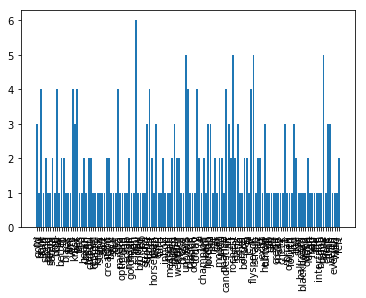

In [33]:
keys = dictionary.keys()
values = dictionary.values()

plt.xticks(rotation='vertical')
plt.bar(keys, values)
plt.show()